In [233]:
import os 

In [234]:
os.chdir('E:\\UTD\\Fall_Sem2018\\Prog with Data Science\\Assignment2')

In [235]:
os.getcwd()

'E:\\UTD\\Fall_Sem2018\\Prog with Data Science\\Assignment2'

In [236]:
import pandas as pd

In [289]:
# Q1) Load in the appropriate csv file as a pandas dataframe (batting.csv)
data = pd.read_csv('Batting.csv')

In [238]:
# Q2.) Print out the dimensions and info about the dataframe you just created
data.describe()

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1932.991869,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,87.105524,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,0.000000,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1905.000000,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1945.000000,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1969.000000,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,1996.000000,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [17]:
data.shape

(102816, 25)

In [128]:
data.isna().sum()

playerID         0
nameFirst        0
nameLast         0
birthYear        0
yearID           0
stint            0
teamID           0
lgID           737
G                0
AB               0
R                0
H                0
2B               0
3B               0
HR               0
RBI            424
SB            1300
CS           23456
BB               0
SO            7838
IBB          36565
HBP           2810
SH            6338
SF           36034
GIDP         26110
dtype: int64

In [90]:
#Q3 How many players have hit 40 or more HRs in one single season? (Number only)
data_3 = data.groupby(['yearID', 'playerID'],as_index = False)['HR'].sum()
data_3[data_3['HR']>=40]['playerID'].unique().shape[0]

142

In [89]:
#Q4  How many players have hit 600 or more HRs for their career? 
#   (Dataframe with name and player first and last name only and amount of HRs)
data_4 = data.groupby(['playerID','nameFirst', 'nameLast'],as_index = False)['HR'].sum()
data_4 = data_4[data_4['HR']>=600]
data_4 = data_4.drop(columns=['playerID'])
data_4

,nameFirst,nameLast,HR
1,Hank,Aaron,755
1542,Barry,Bonds,762
6633,Ken,Griffey,630
10857,Willie,Mays,660
14528,Alex,Rodriguez,696
14865,Babe,Ruth,714
16103,Sammy,Sosa,609
17004,Jim,Thome,612


In [95]:
#Q5 How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? 
#  (Number Only)
data_5 = data.groupby(['yearID', 'playerID'],as_index = False)['2B','3B','H','HR'].sum()
data_5[(data_5['HR']>=30) & (data_5['2B']>=40) & (data_5['3B']>=10) & (data_5['H']>=200)]['playerID'].nunique()

11

In [483]:
#Q6  How many players seasons have had 100 or more SBs? 
#   (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )
data_6 = data.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'],as_index = False)['SB'].sum()
data_6 = data_6[data_6['SB']>=100].sort_values(by='SB', ascending=False)
del data_6['playerID']
data_6 = data_6[['nameFirst', 'nameLast', 'yearID', 'SB']]
data_6

,nameFirst,nameLast,yearID,SB
3322,Hugh,Nicol,1887,138.0
55367,Rickey,Henderson,1982,130.0
3275,Arlie,Latham,1887,129.0
48070,Lou,Brock,1974,118.0
3165,Charlie,Comiskey,1887,117.0
3414,John,Ward,1887,111.0
3903,Billy,Hamilton,1889,111.0
4748,Billy,Hamilton,1891,111.0
58008,Vince,Coleman,1985,110.0
59903,Vince,Coleman,1987,109.0


In [486]:
#Q7  How many players in the 1960s (yearID) have hit 200 or more HRs?
#   (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)
data_7 = data[(data['yearID']>=1960) & (data['yearID']<=1969)]
data_7 = data_7.groupby(['playerID', 'nameFirst', 'nameLast'],as_index = False)['HR'].sum()
data_7 = data_7.sort_values(by='HR', ascending=False)
data_7 = data_7[data_7['HR'] >= 200]
data_7

,playerID,nameFirst,nameLast,HR
856,killeha01,Harmon,Killebrew,393
0,aaronha01,Hank,Aaron,375
1044,mayswi01,Willie,Mays,350
1372,robinfr02,Frank,Robinson,316
1057,mccovwi01,Willie,McCovey,300
751,howarfr01,Frank,Howard,288
279,cashno01,Norm,Cash,278
70,bankser01,Ernie,Banks,269
1009,mantlmi01,Mickey,Mantle,256
283,cepedor01,Orlando,Cepeda,254


In [118]:
#Q8 Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)
data_8 = data.groupby(['playerID', 'nameFirst', 'nameLast'],as_index = False)['HR'].sum()
data_8 = data_8.sort_values(by='HR', ascending=False)
del data_8['playerID']
data_8.head(1) 

,nameFirst,nameLast,HR
1542,Barry,Bonds,762


In [489]:
#Q9 Who had the most hits (H) in the 1970s? (Dataframe)
data_9 = data[(data['yearID']>=1970) & (data['yearID']<=1979)]
data_9 = data_9.groupby(['playerID', 'nameFirst', 'nameLast'],as_index = False)['H'].sum()
data_9 = data_9.sort_values(by='H', ascending=False)
data_9.head(1)

,playerID,nameFirst,nameLast,H
1639,rosepe01,Pete,Rose,2045


In [135]:
#Q10 Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977? 
#   (Dataframe, first name, last name, OBP, ordered descending by OBP)
data_10 = data[(data['yearID']==1977)]
#Calculating PA
data_10['PA'] = data_10['AB'] + data_10['BB'] + data_10['HBP'] + data_10['SH'] + data_10['SF']
data_10 = data_10[data_10['PA']>=500].reset_index(drop=True)
#Formula used:  OBP = (Hits + Walks(BB) + Hit by Pitch) / (At Bats + Walks(BB) + Hit by Pitch + Sacrifice Flies).
data_10['OBP'] = (data_10['H'] + data_10['BB'] + data_10['HBP'])/(data_10['AB'] + data_10['BB'] + data_10['HBP'] + data_10['SF'])
data_10 = data_10[['nameFirst', 'nameLast', 'OBP']].sort_values(by='OBP', ascending=False)
data_10.head()

C:\Users\aabha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,nameFirst,nameLast,OBP
21,Rod,Carew,0.448773
115,Ken,Singleton,0.437788
118,Reggie,Smith,0.426910
55,Mike,Hargrove,0.420312
86,Joe,Morgan,0.417054


In [490]:
#Q11 Top 8 highest averages in 2013 with at least 300 PAs?
#    (Dataframe, first name, last name, average, descending by average)
data_11 = data[(data['yearID']==2013)]
#Calculating PA
data_11['PA'] = data_11['AB'] + data_11['BB'] + data_11['IBB'] + data_11['SH'] + data_11['SF']
data_11 = data_11[data_11['PA']>=300].reset_index(drop=True)
data_11['AVG'] = data_11['H']/data_11['AB']
data_11 = data_11[['nameFirst', 'nameLast', 'AVG']].sort_values(by='AVG', ascending=False)
data_11.head(8)


C:\Users\aabha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,nameFirst,nameLast,AVG
35,Miguel,Cabrera,0.347748
202,Hanley,Ramirez,0.345395
53,Michael,Cuddyer,0.331288
149,Joe,Mauer,0.323596
245,Mike,Trout,0.322581
118,Chris,Johnson,0.321012
82,Freddie,Freeman,0.319419
195,Yasiel,Puig,0.319372


In [343]:
#Q12 Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)
#I have displayed the maximum hits in each year from 1940 to 1949 and the corresponding players who made those hits\

data_12 = data[(data['yearID']>=1940) & (data['yearID']<=1949)]
idx = data_12.groupby(['yearID'])['H'].transform(max) == data_12['H']
data_12 = data_12[idx]
data_12[['nameFirst', 'nameLast', 'yearID','H']]

,nameFirst,nameLast,yearID,H
28773,Doc,Cramer,1940,200
29010,Barney,McCosky,1940,200
29084,Rip,Radcliff,1940,200
29747,Cecil,Travis,1941,218
30191,Johnny,Pesky,1942,205
30709,Stan,Musial,1943,220
31389,Snuffy,Stirnweiss,1944,205
31720,Tommy,Holmes,1945,224
32499,Stan,Musial,1946,228
33128,Johnny,Pesky,1947,207


In [272]:
#Q13. Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

data_13 = data.groupby(['yearID', 'playerID', 'nameFirst', 'nameLast'],as_index = False)['H'].sum()
idx = data_13.groupby(['yearID'])['H'].transform(max) == data_13['H']
data_13 = data_13[idx]
data_13_count = data_13.groupby(['playerID', 'nameFirst', 'nameLast'])['playerID'].agg(['count']).sort_values(by='count', ascending=False)
data_13_final = pd.merge(data_13,data_13_count, how = 'left', on = 'playerID').sort_values(by='count', ascending=False)
del data_13_final['yearID']
data_13_final.head(1)


,playerID,nameFirst,nameLast,H,count
140,suzukic01,Ichiro,Suzuki,242,7


In [299]:
#Q14. Which players have played the most games for their careers?  Top 5 first name, last name, 
#     descending by games played presented as a dataframe

data_14 = data.groupby(['playerID','nameFirst', 'nameLast'],as_index=False)['G'].sum().sort_values(by='G', ascending=False).head(5)
data_14




,playerID,nameFirst,nameLast,G
14719,rosepe01,Pete,Rose,3562
18728,yastrca01,Carl,Yastrzemski,3308
1,aaronha01,Hank,Aaron,3298
7383,henderi01,Rickey,Henderson,3081
3155,cobbty01,Ty,Cobb,3035


In [308]:
#Q15. How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs? 
#     Just a number is okay here.

data_15 = data.groupby(['playerID','nameFirst', 'nameLast'],as_index=False).sum()
data_15 = data_15[(data_15['H']>=3000) & (data_15['HR']>=500)]
data_15['playerID'].nunique()




5

In [310]:
#Q16. How many HRs were hit during the entire 1988 season?  Just a number is okay here

data_16 = data[data['yearID']==1988]
data_16['HR'].sum()

3180

In [334]:
#Q17. Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons 
#    in which he had at least 500 or more ABs.Dataframe, first name, last name, average, descending by average  

data_17 = data[(data['nameFirst']=='Wade') & (data['nameLast']=='Boggs')]
data_17 = data_17.groupby(['yearID', 'nameFirst', 'nameLast'],as_index=False).sum()
data_17 = data_17[data_17['AB']>=500]
data_17['AVG'] = data_17['H']/data_17['AB']
data_17 = data_17.sort_values(by='AVG', ascending=False).head(3)
data_17 = data_17[['yearID','nameFirst', 'nameLast', "AVG"]]
data_17
  

,yearID,nameFirst,nameLast,AVG
3,1985,Wade,Boggs,0.367534
6,1988,Wade,Boggs,0.366438
5,1987,Wade,Boggs,0.362976


In [346]:
# Q18. Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by 
#      OBP descending.  Dadtaframe with first name, last name, OBP

data_18 = data[(data['yearID']==1995)]
#Calculating PA
data_18['PA'] = data_18['AB'] + data_18['BB'] + data_18['HBP'] + data_18['SH'] + data_18['SF']
data_18 = data_18[data_18['PA']>=400].reset_index(drop=True)
#Formula used:  OBP = (Hits + Walks(BB) + Hit by Pitch) / (At Bats + Walks(BB) + Hit by Pitch + Sacrifice Flies).
data_18['OBP'] = (data_18['H'] + data_18['BB'] + data_18['HBP'])/(data_18['AB'] + data_18['BB'] + data_18['HBP'] + data_18['SF'])
data_18 = data_18[['nameFirst', 'nameLast', 'OBP']].sort_values(by='OBP', ascending=False)
data_18.head(10)



C:\Users\aabha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,nameFirst,nameLast,OBP
103,Edgar,Martinez,0.478873
147,Frank,Thomas,0.454405
107,Mark,McGwire,0.440758
148,Jim,Thome,0.438061
18,Barry,Bonds,0.431496
133,Tim,Salmon,0.429467
42,Chili,Davis,0.429119
100,Dave,Magadan,0.427553
91,Chuck,Knoblauch,0.424483
117,Tim,Naehring,0.414729


In [354]:
# Q19.) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  
#       I would like a dataframe with first name, last name, number of 3Bs

data_19 = data[(data['yearID']==1922) | (data['yearID']==1925) | (data['yearID']==1926) | (data['yearID']==1928) ]
data_19 = data_19.groupby(['playerID','nameFirst', 'nameLast'],as_index=False)['3B'].sum().sort_values(by='3B', ascending=False)
data_19.head(1)

# The below code can be used if you you want the leaders in 3B year-wise.
#data_19 = data[(data['yearID']==1922) | (data['yearID']==1925) | (data['yearID']==1926) | (data['yearID']==1928) ]
#data_19 = data_19.groupby(['playerID','nameFirst', 'nameLast'],as_index=False)['3B'].sum().sort_values(by='3B', ascending=False)
#idx = data_19.groupby(['yearID'])['3B'].transform(max) == data_19['3B']
#data_19 = data_19[idx]
#data_19

,playerID,nameFirst,nameLast,3B
1011,walkecu01,Curt,Walker,59


In [366]:
# Q20.) How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases? 
#       A number is okay here

data_20 = data.groupby(['yearID','playerID','nameFirst', 'nameLast'], as_index=False)['HR','SB'].sum()
data_20 = data_20[(data_20['HR']>=30) & (data_20['SB']>=30)]
data_20['playerID'].nunique()




38

In [378]:
# Q21) Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

data_21 = data[(data['yearID']==1986) & (data['AB']>=400) ]
data_21['OBP'] = (data_21['H'] + data_21['BB'] + data_21['HBP'])/(data_21['AB'] + data_21['BB'] + data_21['HBP'] + data_21['SF'])
data_21 = data_21[['nameFirst','nameLast', 'OBP']].sort_values(by='OBP', ascending=False)
data_21.head(1)

C:\Users\aabha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,nameFirst,nameLast,OBP
63320,Wade,Boggs,0.45283


In [380]:
# Q22)Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)
data_22 = data[(data['yearID']==1997) & (data['AB']>=400) & (data['lgID']=='NL') ]
data_22['OBP'] = (data_22['H'] + data_22['BB'] + data_22['HBP'])/(data_22['AB'] + data_22['BB'] + data_22['HBP'] + data_22['SF'])
data_22 = data_22[['nameFirst','nameLast', 'OBP']].sort_values(by='OBP', ascending=False)
data_22.head(1)


C:\Users\aabha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,nameFirst,nameLast,OBP
76562,Larry,Walker,0.451807


In [492]:
# Q23) Who had more than the league average HRs (for players with 500 or more ABs) in 2012 
#     (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

data_23 = data.groupby(['yearID', 'lgID','playerID','nameFirst', 'nameLast'],as_index=False).sum()
data_23 = data_23[(data_23['yearID']==2012) & (data_23['AB']>=500)]
mean_HR = data_23.groupby(['lgID'],as_index=False)['HR'].mean()
mean_HR.columns = ['lgID', 'AvgHR']
data_23 = pd.merge(data_23, mean_HR, how='left', on='lgID')
data_23 = data_23[data_23['HR'] > data_23['AvgHR']]
data_23 = data_23[['nameFirst', 'nameLast', 'HR', 'AvgHR']]
data_23.sort_values(by='HR', ascending=False)           



,nameFirst,nameLast,HR,AvgHR
9,Miguel,Cabrera,44,20.253968
22,Curtis,Granderson,43,20.253968
23,Josh,Hamilton,43,20.253968
16,Edwin,Encarnacion,42,20.253968
15,Adam,Dunn,41,20.253968
70,Ryan,Braun,41,20.400000
5,Adrian,Beltre,36,20.253968
59,Josh,Willingham,35,20.253968
71,Jay,Bruce,34,20.400000
10,Robinson,Cano,33,20.253968


In [430]:
# Q24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

data_24 = data.groupby(['yearID','playerID','nameFirst', 'nameLast', 'birthYear'],as_index=False)['HR'].sum()
data_24 = data_24[data_24['HR']>=50]
data_24['age'] = data_24['yearID'] - data_24['birthYear']
data_24.sort_values(by='age').head(1)         



,yearID,playerID,nameFirst,nameLast,birthYear,HR,age
82621,2007,fieldpr01,Prince,Fielder,1984,50,23


In [465]:
# Q25) Who are the five youngest players to hit 300 or more HRs for their career? 
#      (Dataframe, first name, last name, season they eclipsed more than 300 HRs)


data_25 = data.groupby(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID'] ).sum().groupby(level=0).cumsum().reset_index().copy()
data_25 = data_25[data_25['HR'] >= 300].sort_values(by = ['yearID', 'birthYear', 'playerID'])[['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'HR']]
data_25['Age'] = data_25['yearID'] - q25['birthYear']
del data_25['playerID']
del data_25['birthYear']
data_25.sort_values(by = 'Age', ascending = True).head(5).reset_index(drop=True)


,nameFirst,nameLast,yearID,HR,Age
0,Albert,Pujols,2008,319,28
1,Mel,Ott,1937,306,28
2,Andruw,Jones,2005,301,28
3,Jimmie,Foxx,1935,302,28
4,Alex,Rodriguez,2003,345,28


In [466]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5,1,'Total HRs per Season')

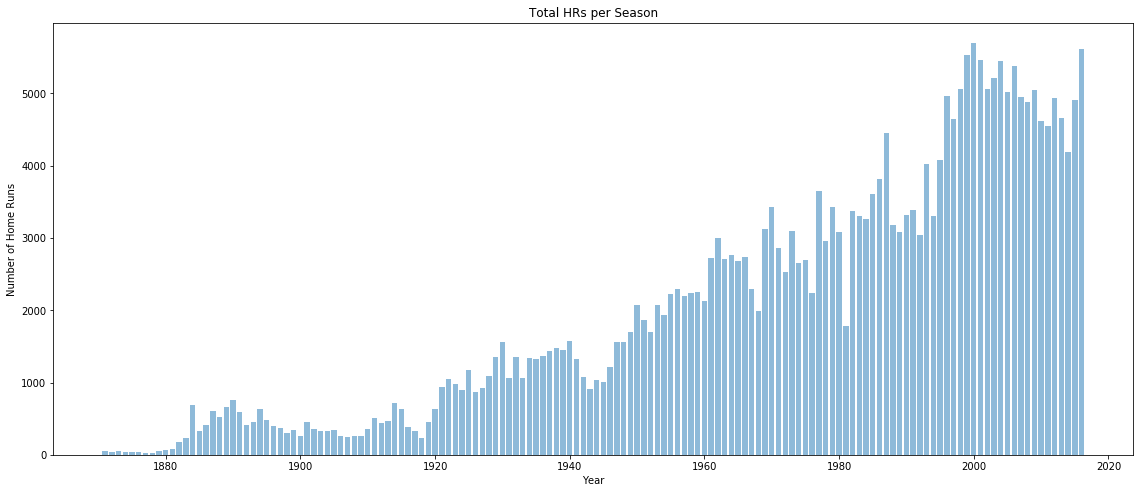

In [472]:
# BONUS Q1:  Graph total HRs per season using bar graph

Bonus1 = data.groupby('yearID', as_index=False).sum()
Bonus1['HR']
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2.5, 1.5])
axes.bar(Bonus1['yearID'], Bonus1['HR'], align='center', alpha=0.5)
axes.set_ylabel('No. of Home Runs')
axes.set_xlabel('Year')
axes.set_title('Total HRs per Season')
 

Text(0.5,1,'Average HRs per AB per Season')

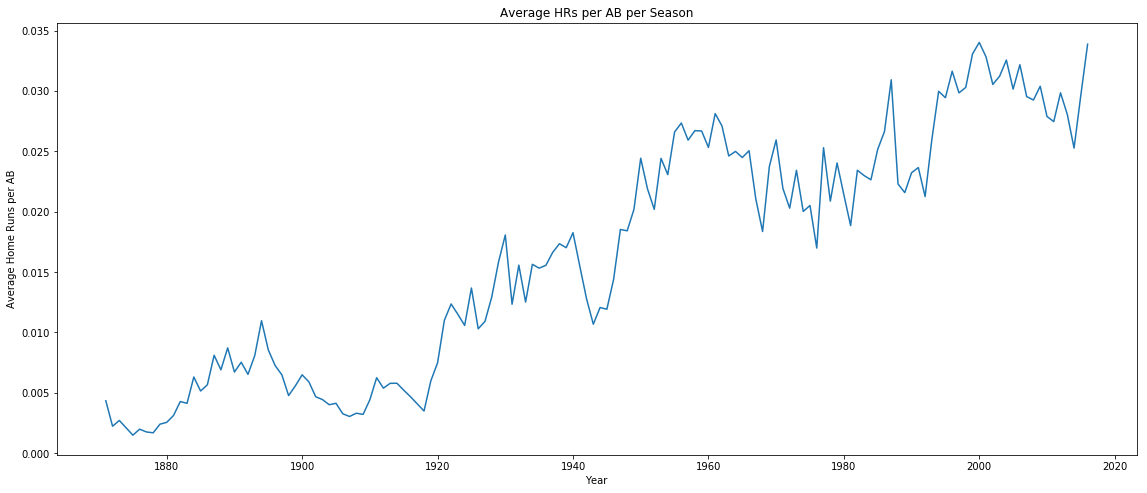

In [473]:
# Bonus Q2: Using a line graph please graph the average HRs per AB (think about this) per season
Bonus2 = data.groupby('yearID',as_index=False).mean().copy()
Bonus2['Req_Avg'] = Bonus2['HR']/Bonus2['AB']
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2.5, 1.5])
axes.plot(Bonus2['yearID'], Bonus2['Req_Avg'])
axes.set_ylabel('Average Home Runs per AB')
axes.set_xlabel('Year')
axes.set_title('Average HRs per AB per Season')